# Simple 1D Robust Design Example

This notebook defines an example objective function, then uses stochastic collocation to evaluate the output statistics (mean and standard deviation) as a function of the input standard deviation.

This animation allows you to change the input standard deviation and observe the mean performance of the function.  It also shows the Gaussian distribution corresponding to the input $x$ located at the optimal $x$ just to give you a feel for what the standard deviation looks like.

In [15]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi


def obj(x):

    coeff = [-0.1043, -0.2648, -0.2097, -1.8667, 2.3477, 2.9801, 2.8190]
    return np.polynomial.legendre.legval(2*x-1, coeff)


def stats(stdev, x):
    # compute mean and standard deviation using Gauss quadrature
    xq = [-2.35060497367, -1.33584907401, -0.436077411928, 0.436077411928, 1.33584907401, 2.35060497367]
    wq = [0.00453000990551, 0.157067320323, 0.724629595224, 0.724629595224, 0.157067320323, 0.00453000990551]
    
    nx = len(x)
    nq = len(xq)
    mu = np.zeros(nx)
    sigma = np.zeros(nx)
    
    for i in range(nx):
        mu[i] = 0.0
        sigma[i] = 0.0
        
        for j in range(nq):
            fnc = obj(sqrt(2)*stdev*xq[j]+x[i])
            mu[i] += wq[j]*fnc
            sigma[i] += wq[j]*fnc*fnc

        mu[i] = mu[i]/sqrt(pi)
        sigma[i] = sqrt(sigma[i]/sqrt(pi) - mu[i]*mu[i]);


    return mu, sigma



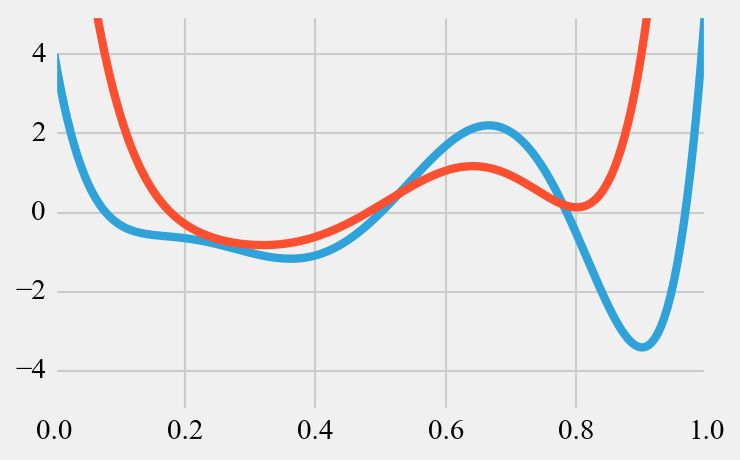

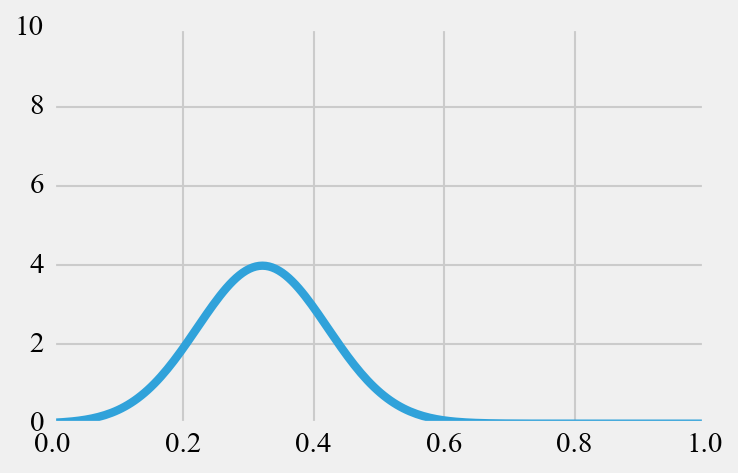

In [16]:
x = np.linspace(0, 1, 200)
y = obj(x)

from ipywidgets import interact
from scipy.stats.distributions import norm

plt.style.use('fivethirtyeight')

@interact(stdev=(0.01, 0.2, 0.01))
def variability(stdev):


    ym, ys = stats(stdev, x)


    plt.figure(figsize=(5, 3))
    plt.plot(x, y)
    plt.plot(x, ym)
    plt.ylim([-5, 5])
    
    imin = np.argmin(ym)
    xmin = x[imin]
    yn = norm.pdf(x, loc=xmin, scale=stdev)

    plt.figure(figsize=(5, 3))
    plt.plot(x, yn)
    plt.ylim([0, 10])
    plt.show()

In [17]:
from IPython.display import HTML

HTML('''
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>
<ul>
<li>The code is in Python. Matlab does not work with the interactive elements used in this notebook.
<li>Interactivity does not currently work online.  Wait until release of ipywidgets 6.0, or you can download and run through a local installation of Jupyter.
</ul>
''')